In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn import metrics
from keras import models
from keras import layers
from keras.layers import Dense,Dropout
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing

In [2]:
iris_df=pd.read_csv(r"C:\Users\Subhanghi\Downloads\archive (3)\IRIS.csv")

In [3]:
iris_df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_2348\773521907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_df['sepal_width'])


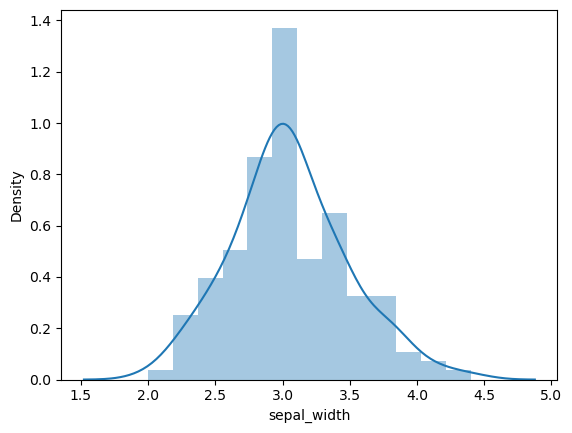

In [6]:
sns.distplot(iris_df['sepal_width']) 
plt.show()

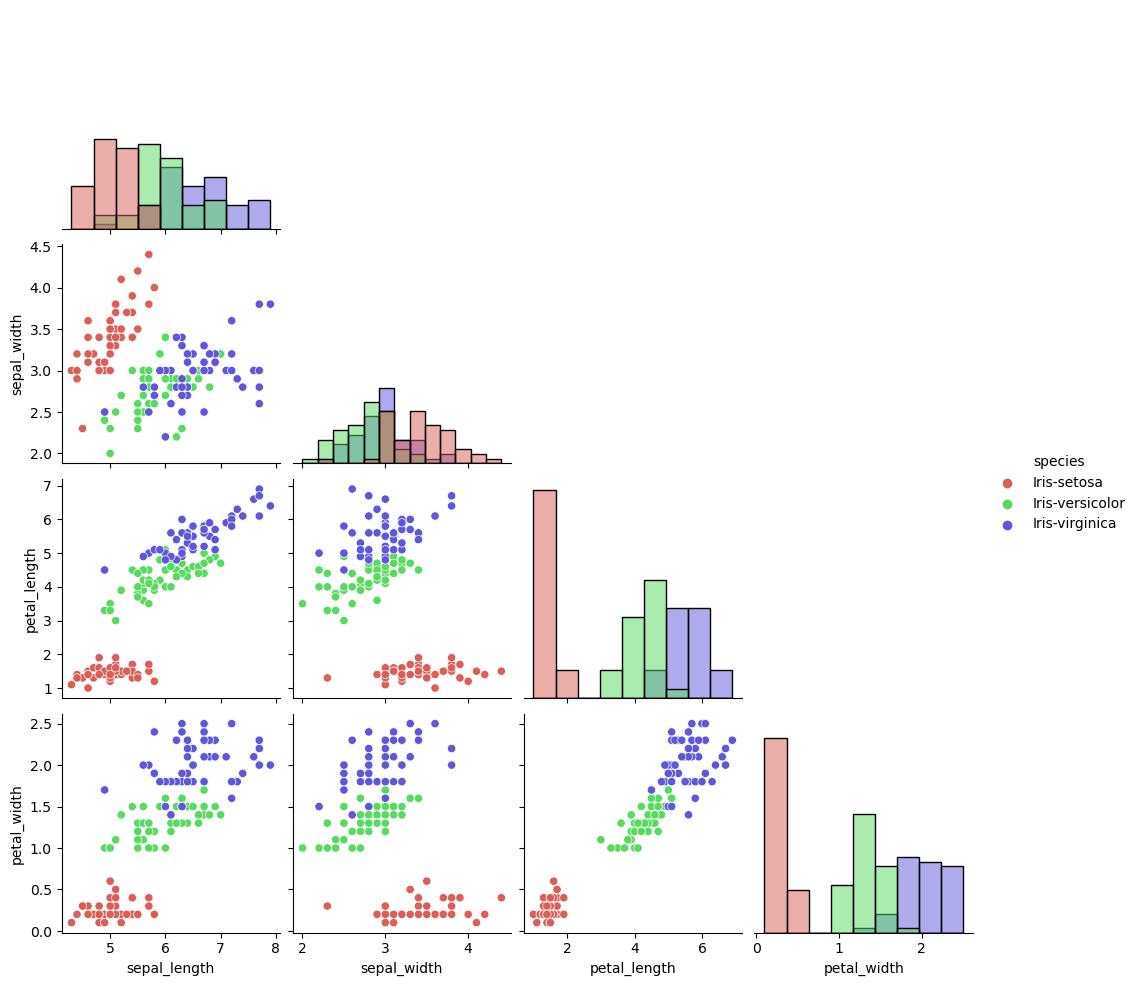

In [7]:
sns.pairplot(iris_df , hue='species' , diag_kind="hist" , corner=True , palette = 'hls')

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_7564\4234691709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(),cmap='YlGnBu')


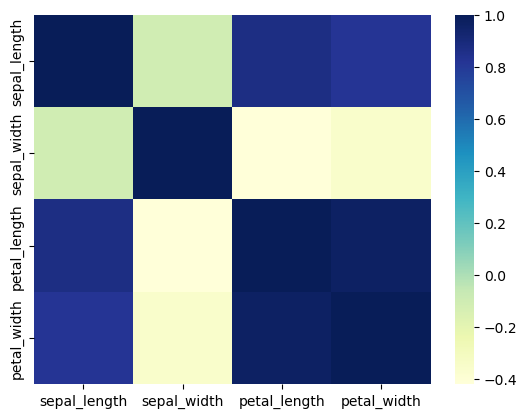

In [76]:
sns.heatmap(iris_df.corr(),cmap='YlGnBu')
plt.show()

In [11]:
X = pd.DataFrame(iris_df , columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
Y = iris_df["species"].values.reshape(-1,1)


In [8]:
iris_df["species"].replace({"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2} , inplace = True)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
type(X)

pandas.core.frame.DataFrame

In [78]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
X_train,X_test,Y_test,Y_train=train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:


Scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Norm1 = Scaler.fit_transform(iris_df)
Norm1_df=pd.DataFrame (Norm1 , columns = ["species" , "sepal_length" , "sepal_width" , "petal_length" , "petal_width"])
Norm1_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [16]:
log=LogisticRegression()
log.fit(X_test,Y_train)
Y_pred=log.predict(X_test)

C:\Users\Subhanghi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
log.fit(X_test,Y_train)

C:\Users\Subhanghi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [18]:
Y_pred = log.predict(X_test)

In [19]:
classification_report(Y_train,Y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [24]:
linear=LinearRegression()
linear.fit(X_test,Y_train)

LinearRegression()

In [25]:
Y_pred=linear.predict(X_test)
Y_pred

array([[ 1.0655776 ],
       [ 0.02070766],
       [ 2.08943979],
       [ 1.30443811],
       [ 1.16152869],
       [ 0.07049402],
       [ 1.05317072],
       [ 1.96463811],
       [ 1.21296294],
       [ 0.97236882],
       [ 1.77501856],
       [-0.15838981],
       [-0.12641367],
       [-0.14576908],
       [ 0.06260671],
       [ 1.41939125],
       [ 2.02496392],
       [ 0.89461687],
       [ 1.16592696],
       [ 1.98776272],
       [-0.01489942],
       [ 1.60895703],
       [ 0.13326255],
       [ 1.90539297],
       [ 1.8595727 ],
       [ 1.99383638],
       [ 1.62331138],
       [ 2.10568578],
       [ 0.00634969],
       [-0.03650996]])

In [27]:
accuracy=r2_score(Y_train,Y_pred)

In [28]:
accuracy

0.9583691889568507

In [30]:
model=RandomForestClassifier()
model.fit(X_test,Y_train) ##training
Y_pred=model.predict(X_test)## testing
print(classification_report(Y_train,Y_pred))

C:\Users\Subhanghi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

